##evaluation-
###seperability metric
asumptions:
1. we can identify subjects that the public opinion about can be seperated between the different sides of the political spectrum.
2. crertain media sources can be identified with one side of the political spectrum

In [319]:
import pandas as pd
import seaborn as sns


In [320]:
#links to models output
LEFT = "cnn_israel_sentiment_1.csv"
RIGHT = "fox_israel_sentiment_1.csv"

In [321]:
left_wing = pd.read_csv(LEFT)
right_wing = pd.read_csv(RIGHT)

In [322]:
left_wing.head()

,title,date,index,neg_s,neu_s,pos_s,compound_s,neg,neu,pos,compound
0,Opinion: Why Netanyahu is suddenly a lot less ...,2023-02-07T15:24:25Z,0.0,0.049368,0.416605,0.060368,0.074053,0.087,0.788,0.126,0.9866
1,China wants to dominate the 'near space' battl...,2023-02-09T09:02:23Z,1.0,0.000000,0.026818,0.003485,0.015473,0.051,0.889,0.060,0.8798
2,Israel targets Gaza with airstrikes after inte...,2023-02-02T06:44:02Z,2.0,0.093875,0.732250,0.048750,-0.400888,0.128,0.813,0.060,-0.9850
3,Israel and Sudan finalize text of peace agreem...,2023-02-02T21:14:58Z,3.0,0.020125,0.689000,0.165875,0.553175,0.011,0.814,0.175,0.9964
4,Two dead including child as car rams people at...,2023-02-10T13:23:35Z,4.0,0.047438,0.322313,0.005313,-0.162925,0.111,0.854,0.035,-0.9889


In [323]:
right_wing.head()

,title,date,index,neg_s,neu_s,pos_s,compound_s,neg,neu,pos,compound
0,Ilhan Omar labeled a 'liar' after claiming she...,2023-01-30T12:00:00Z,0.0,0.023107,0.175964,0.015214,-0.029229,0.079,0.863,0.059,-0.9136
1,"Condemns Kanye, Fuentes, antisemitism...",2023-01-27T21:13:37Z,1.0,0.007100,0.092900,0.000000,-0.031820,0.085,0.859,0.056,-0.9668
2,A handful of Republicans may save Ilhan Omar's...,2023-01-30T19:56:00Z,2.0,0.005233,0.091567,0.003200,-0.000377,0.057,0.891,0.051,0.1078
3,Iran shows off new deadly missile with 'death ...,2023-02-09T16:55:04Z,3.0,0.063231,0.361846,0.036462,-0.174085,0.140,0.781,0.079,-0.9872
4,Israel to send earthquake aid to old foe Syria...,2023-02-06T19:20:57Z,4.0,0.097222,0.540000,0.029222,-0.381756,0.096,0.844,0.061,-0.9629


In [324]:
def relevant_data(data, columns =[]):
    relevant = data[columns]
    relevant['date']  =pd.to_datetime(relevant['date'] )
    relevant['Date'] = relevant['date'].dt.date
    relevant = relevant.drop('date', axis=1)
    relevant= relevant.rename(columns={'compound_s':'score'})
    return relevant


In [325]:
left = relevant_data(left_wing, ["date","compound_s"])
right = relevant_data(right_wing, ["date","compound_s"])

C:\Users\eladv\AppData\Local\Temp\ipykernel_10052\1599345511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant['date']  =pd.to_datetime(relevant['date'] )
C:\Users\eladv\AppData\Local\Temp\ipykernel_10052\1599345511.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant['Date'] = relevant['date'].dt.date
C:\Users\eladv\AppData\Local\Temp\ipykernel_10052\1599345511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [326]:
import datetime 
print(left.shape)
print(right.shape)

(26, 2)
(97, 2)


In [327]:
def align_time_period(left, right):
    left['Date']= pd.to_datetime(left['Date'])
    right['Date']= pd.to_datetime(right['Date'])
    l_min_date = left['Date'].min()
    r_min_date = right['Date'].min()
    l_max_date = left['Date'].max()
    r_max_date = right['Date'].max()
    upper_border = min(l_max_date,r_max_date)
    lower_border = max(l_min_date,r_min_date)
    right = right[right.Date <upper_border]  
    right = right[right.Date >lower_border]
    left = left[left.Date <upper_border]
    left = left[left.Date >lower_border ]
    return left, right

In [328]:
left, right =align_time_period(left, right)

In [329]:
print(left.shape)
print(right.shape)

(19, 2)
(40, 2)


In [330]:
left.head(5)

,score,Date
0,0.074053,2023-02-07
1,0.015473,2023-02-09
2,-0.400888,2023-02-02
3,0.553175,2023-02-02
4,-0.162925,2023-02-10


In [331]:
right.head(5)

,score,Date
3,-0.174085,2023-02-09
4,-0.381756,2023-02-06
5,0.000000,2023-02-06
6,0.048650,2023-02-09
7,-0.169125,2023-02-02


In [332]:
left['source'] = 'left'
right['source'] = 'right'


In [333]:

avg_left = left['score'].mean()
avg_right = right['score'].mean()
print(avg_left)
print(avg_right)

-0.004782915116238286
-0.0966836066973468


In [334]:
if avg_left>avg_right:
    top = 'left'
else:
    top = 'right'

In [335]:
left.shape

(19, 3)

In [336]:
right.shape

(40, 3)

In [337]:
result = pd.concat([left,right])

In [338]:

import datetime 
result['Date']= pd.to_datetime(result['Date'])


<AxesSubplot:ylabel='source'>

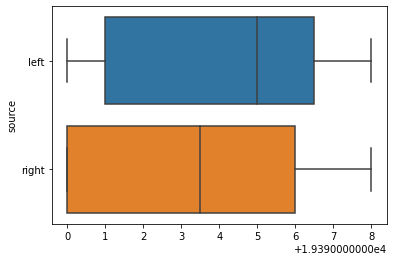

In [339]:
import matplotlib.dates as mdates
sns.boxplot(data=result,x=mdates.date2num(result.Date), y='source')

<AxesSubplot:xlabel='Date', ylabel='score'>

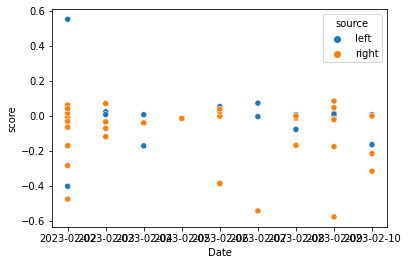

In [340]:
sns.scatterplot(data=result, x="Date", y="score", hue="source")


<AxesSubplot:xlabel='Date', ylabel='score'>

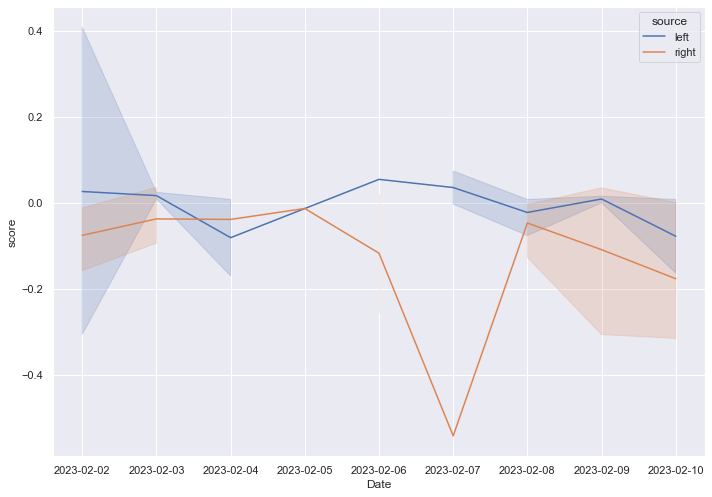

In [354]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(data=result, x="Date", y="score", hue="source")

<AxesSubplot:xlabel='score', ylabel='source'>

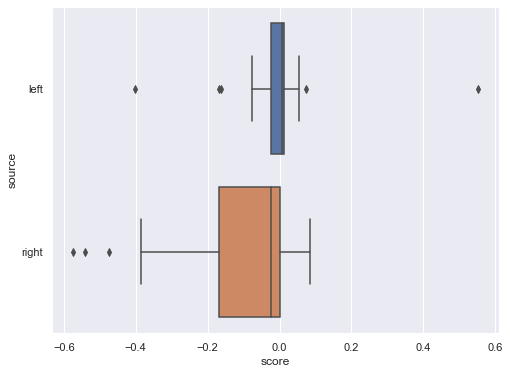

In [356]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(data=result, x="score", y="source")

<AxesSubplot:xlabel='score', ylabel='source'>

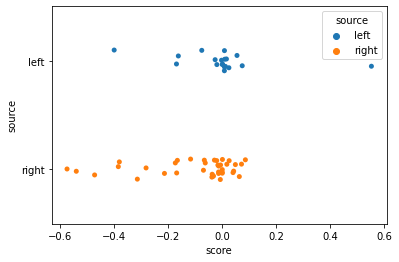

In [342]:
sns.stripplot(data=result, x="score", y="source", hue = 'source')

how can we seperate?


In [343]:
import jenkspy
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [344]:
tresh_hold = jenkspy.jenks_breaks(result['score'], n_classes=2)#supposed to give me the best treshhold


In [345]:
tresh_hold[1]

-0.2144045454545455

C:\Users\eladv\AppData\Local\Temp\ipykernel_10052\2456588236.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.yticks([])


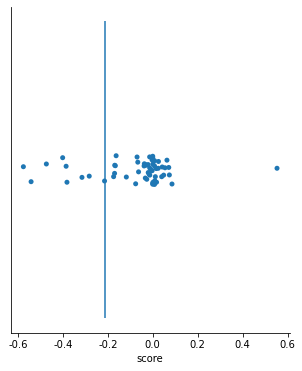

In [346]:
plt.figure(figsize=(5,6))
sns.stripplot(x = 'score', data = result,jitter=True, edgecolor='none')
sns.despine()
locs, labels =plt.xticks()
plt.xticks(locs, map(lambda x: "%.1f" % x, locs))
plt.xlabel('score')
plt.yticks([])
plt.vlines(tresh_hold[1], ymax=1, ymin =-1)

<AxesSubplot:xlabel='score'>

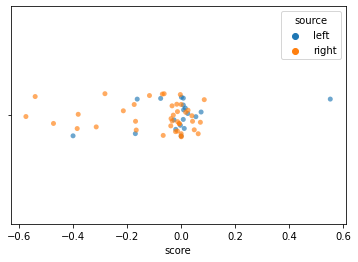

In [347]:
sns.stripplot(x = 'score', hue = 'source',data = result,jitter=True, edgecolor='none', alpha = 0.65)

In [348]:
if top =='left':
    result["cluster"] =  np.where(result['score'] > tresh_hold[1],'left','right')
else:
    result["cluster"] =  np.where(result['score'] > tresh_hold[1],'right','left')

<AxesSubplot:xlabel='Date', ylabel='score'>

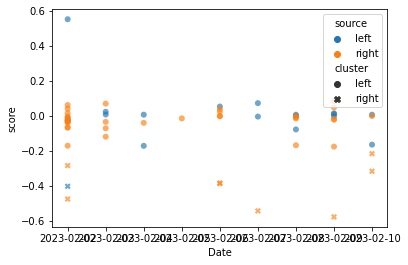

In [349]:
sns.scatterplot(data = result, y='score',x='Date', hue = 'source', style = 'cluster', edgecolor='none', alpha = 0.65)

In [350]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=contingency_matrix)
    disp.plot()
    plt.show()
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

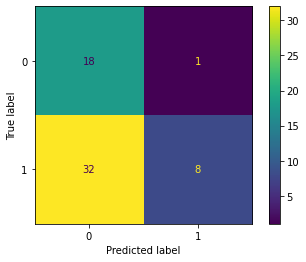

In [351]:
purity = purity_score(result["source"], result["cluster"])

In [352]:
purity

0.6779661016949152